Holland(1980)

$P =  (P_{e} - P_{min})e^{-\frac{R_m}{r}} +P_{min}$

$V_g^2 = \frac{r}{\rho} \frac{dP}{dr} +frV_g$ 

$V_r = -aV_g$

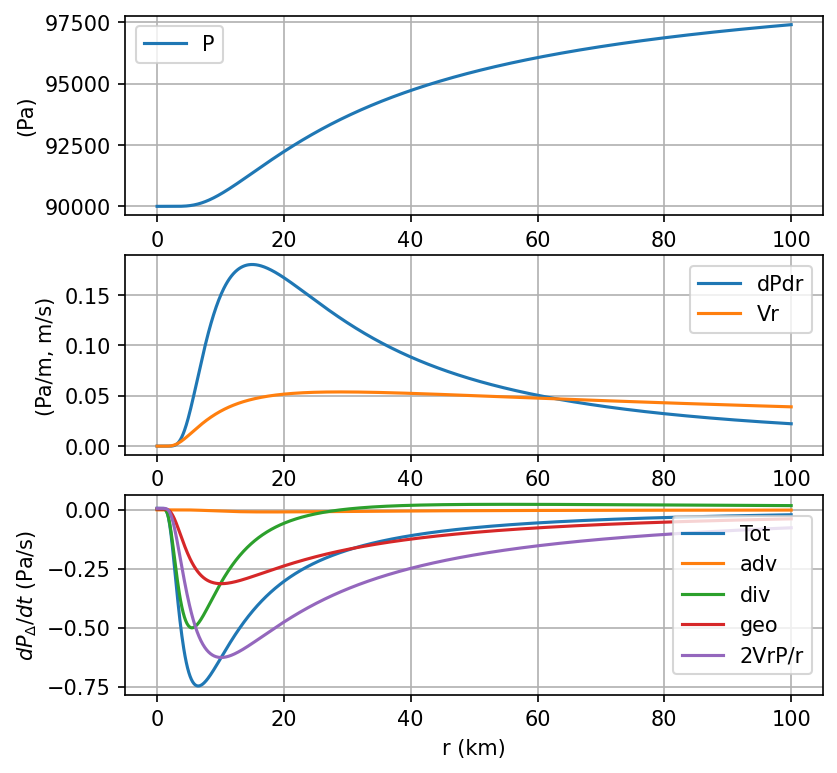

In [13]:
import numpy as np
from matplotlib import pyplot as plt

Rm=30*1000
r=np.linspace(10,100*1000,1000)
rkm=r/1000
dr=r[1]-r[0]
B=1
Pe=100000
Pmin=90000
a=0.0005

f=2*7.29e-5*np.sin(30*np.pi/180)
rho=1.22

def calc_Pr(r):
    return(np.exp(-(Rm/r)**B)*(Pe-Pmin)+Pmin)

def calc_dPdr(r):
    return((calc_Pr(r)-Pmin)*B*(Rm**B)*(r**(-B-1)))

def calc_d2Pdr2(r):
    return(B*(Rm**B)*(calc_dPdr(r)*(r**(-B-1))-(calc_Pr(r)-Pmin)*(B+1)*r**(-B-2)))

def calc_Vr(r):
    return(-a*calc_Vg(r))
#     return(a*calc_dPdr(r))
def calc_dVrdr(r):
#     return(a*calc_d2Pdr2(r))
    return(np.gradient(calc_Vr(r))/dr)

def calc_Vg(r):
    return(-f*r+np.sqrt((f*f)**2+4*(Pe-Pmin)*Rm*np.exp(-(Rm/r))/(rho*r)))
    
Pr=calc_Pr(r)
dPdr=calc_dPdr(r)
Vr=calc_Vr(r)
Vg=calc_Vg(r)       
dVrdr=calc_dVrdr(r)

adv=-Vr*dPdr
div=-Pr*dVrdr
geo=-Pr*Vr/r
tot=adv+div+geo
dPbardt=2*Pr*Vr/r
       
fig,axs=plt.subplots(3,1,figsize=(6,6),dpi=150)
ax=axs[0]
ax.plot(rkm,Pr)
ax.grid(True)
ax.set_ylabel('(Pa)')
ax.legend(('P'))

ax=axs[1]
# ax[0].plot(r,Pr);
ax.plot(rkm,dPdr)
ax.plot(rkm,-Vr)
ax.grid(True)
ax.legend(('dPdr','Vr'))
ax.set_ylabel('(Pa/m, m/s)')

ax=axs[2]
ax.plot(rkm,-tot)
ax.plot(rkm,-adv)
ax.plot(rkm,-div)
ax.plot(rkm,-geo)
ax.plot(rkm,dPbardt)
ax.grid(True)
ax.set_xlabel('r (km)')
ax.set_ylabel('$dP_\Delta/dt$ (Pa/s)')
ax.legend(('Tot','adv','div','geo','2VrP/r'),loc='right');